# Reprocessing Data

In [14]:
import pandas as pd
import numpy as np

In [15]:
# Baca dataset (ubah nama sesuai file kamu)
df = pd.read_csv('dataset_komentar_mbg_1500.csv')

# Tampilkan 5 baris pertama
df.head()

,keyword,video_title,video_id,video_date,author,comment_text,likes,comment_date
0,Program makan siang bergizi,Penelusuran Dapur Makan Bergizi Gratis | Prime...,6lTjTgXMbaw,2025-09-25T13:41:20Z,@SriYuliarti-z5z,😱😱😱😱😱😱😱,0,2025-11-23T10:18:57Z
1,Program makan siang bergizi,Penelusuran Dapur Makan Bergizi Gratis | Prime...,6lTjTgXMbaw,2025-09-25T13:41:20Z,@sabitaputri2665,Bubar aja mbg itu. Bagus di kasih uang jajan a...,0,2025-11-17T11:32:11Z
2,Program makan siang bergizi,Penelusuran Dapur Makan Bergizi Gratis | Prime...,6lTjTgXMbaw,2025-09-25T13:41:20Z,@danendra_mahatma7,"Wajib diapresiasi, Presiden Prabowo konsisten ...",0,2025-11-02T20:15:37Z
3,Program makan siang bergizi,Penelusuran Dapur Makan Bergizi Gratis | Prime...,6lTjTgXMbaw,2025-09-25T13:41:20Z,@FananI-r6d,Astaghfirullah,0,2025-11-01T08:46:38Z
4,Program makan siang bergizi,Penelusuran Dapur Makan Bergizi Gratis | Prime...,6lTjTgXMbaw,2025-09-25T13:41:20Z,@amieramierkhan-o6i,Di sekolah aku ada 😢😢😢,0,2025-11-01T00:12:17Z


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   keyword       1495 non-null   object
 1   video_title   1495 non-null   object
 2   video_id      1495 non-null   object
 3   video_date    1495 non-null   object
 4   author        1495 non-null   object
 5   comment_text  1494 non-null   object
 6   likes         1495 non-null   int64 
 7   comment_date  1495 non-null   object
dtypes: int64(1), object(7)
memory usage: 93.6+ KB


In [17]:
df.isnull().sum()

,0
keyword,0
video_title,0
video_id,0
video_date,0
author,0
comment_text,1
likes,0
comment_date,0


## hapus data kosong

In [18]:
# 4. Bersihkan Data Kosong
# Hapus NaN dan string kosong
df['comment_text'] = df['comment_text'].replace(r'^\s*$', np.nan, regex=True)
df = df.dropna()

## hapus duplikat data

In [19]:
# 4. Hapus Duplikat
# keep='first' artinya simpan 1 versi, hapus sisanya
df = df.drop_duplicates(subset=['comment_text'], keep='first')

## filter kolom

In [20]:
# Filter Kolom: Ambil hanya kolom 'comment'
df = df[['comment_text']].copy()

df.head()

,comment_text
0,😱😱😱😱😱😱😱
1,Bubar aja mbg itu. Bagus di kasih uang jajan a...
2,"Wajib diapresiasi, Presiden Prabowo konsisten ..."
3,Astaghfirullah
4,Di sekolah aku ada 😢😢😢


## membersihkan data kosong

In [21]:
# 3. Membersihkan Data Kosong
# Tahap A: Ubah string kosong ('') atau spasi ('   ') menjadi NaN agar terdeteksi
df['comment_text'] = df['comment_text'].replace(r'^\s*$', np.nan, regex=True)

In [22]:
# Tahap B: Hapus semua baris yang bernilai NaN
df = df.dropna()

In [23]:
# Cek Hasil
print(f"Jumlah baris data bersih: {len(df)}")
print(df.head())

Jumlah baris data bersih: 1491
                                        comment_text
0                                            😱😱😱😱😱😱😱
1  Bubar aja mbg itu. Bagus di kasih uang jajan a...
2  Wajib diapresiasi, Presiden Prabowo konsisten ...
3                                     Astaghfirullah
4                           Di sekolah  aku  ada 😢😢😢


In [24]:
df.isnull().sum()

,0
comment_text,0


In [25]:
nama_file_baru = 'cleaned_comments.csv'
df.to_csv(nama_file_baru, index=False)

In [26]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 9.4 MB/s eta 0:00:00


In [27]:
import re
import emoji # Pastikan sudah pip install emoji

In [28]:
import pandas as pd
import re

# 1. Load Data
df = pd.read_csv('cleaned_comments.csv')

# 2. Fungsi Filter Cerdas
def filter_quality(text):
    if not isinstance(text, str):
        return False

    # Hapus semua karakter SELAIN huruf a-z (ignore case)
    # Ini untuk menghitung "kandungan kata" yang sebenarnya
    pure_text = re.sub(r'[^a-zA-Z]', '', text)

    # Aturan 1: Jika panjang huruf 0 (berarti isinya cuma emoji/angka/simbol) -> HAPUS
    if len(pure_text) == 0:
        return False

    # Aturan 2: Jika panjang huruf <= 3 (berarti cuma "oke", "y", "top") -> HAPUS
    if len(pure_text) <= 3:
        return False

    return True

# 3. Terapkan Filter
# Ambil hanya baris yang memenuhi syarat (True)
df_clean = df[df['comment_text'].apply(filter_quality)]

# 4. Simpan
df_clean.to_csv('dataset_final_filtered.csv', index=False)

print(f"Pembersihan selesai. Sisa data: {len(df_clean)} baris.")

Pembersihan selesai. Sisa data: 1451 baris.


In [29]:
# Cek nama kolom
col_target = 'comment_text'
print(f"Memproses {len(df)} data...")

# =============================================================================
# KAMUS NORMALISASI (SLANG)
# =============================================================================
norm_dict = {
    # Singkatan Umum
    'yg': 'yang', 'ga': 'tidak', 'gak': 'tidak', 'nggak': 'tidak', 'kaga': 'tidak',
    'dgn': 'dengan', 'sdh': 'sudah', 'udh': 'sudah', 'dah': 'sudah',
    'kalo': 'kalau', 'kl': 'kalau', 'bgt': 'banget', 'dlm': 'dalam',
    'krn': 'karena', 'utk': 'untuk', 'mbg': 'makan bergizi gratis',
    'gw': 'saya', 'aku': 'saya', 'sy': 'saya', 'gue': 'saya', 'ane': 'saya',
    'jd': 'jadi', 'jgn': 'jangan', 'tp': 'tapi', 'tpi': 'tapi',
    'blm': 'belum', 'bkn': 'bukan', 'tdk': 'tidak', 'tak': 'tidak',
    'sih': '', 'dong': '', 'kok': '', 'mah': '', # Partikel (bisa dihapus)
    'dr': 'dari', 'sm': 'sama', 'adlah': 'adalah', 'biar': 'agar', 'gitu': 'begitu',
    'mkn': 'makan', 'duit': 'uang', 'tu': 'itu', 'koropsi': 'korupsi',

    # Typo / Alay Spesifik (Tambahkan sesuai temuan di data Anda)
    'bgus': 'bagus', 'keren': 'keren', 'jlek': 'jelek',
    'ancur': 'hancur', 'mlm': 'malam', 'pgi': 'pagi',
    'bnyak': 'banyak', 'byk': 'banyak', 'dikit': 'sedikit',
    'org': 'orang', 'ank': 'anak', 'skolah': 'sekolah',
    'dri': 'dari', 'krja': 'kerja', 'smga': 'semoga',
    'mrnurut': 'menurut', 'sslebuh': 'lebih', 'bsik': 'baik',
    'fubetijsnnke': 'diberikan ke', 'diswa': 'siswa',
    'agsknoercumsh': 'daripada percuma', 'jarena': 'menu',
    'nyacjauuh': 'nya jauh', 'daru': 'dari', 'msksndn': 'makanan',
    'sppg': 'yang', 'hsngalah': 'hanyalah', 'asalsn': 'asalan',
    'bikjnnmenunya': 'bikin menunya', 'taj': 'tak', 'sesyai': 'sesuai',
    'majsnsn': 'makanan', 'sehatvlim': 'sehat lima', 'hspusjsn': 'hapuskan',
    'saha': 'saja'
}

def normalize_slang(text):
    words = text.split()
    normalized_words = [norm_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

Memproses 1491 data...


In [30]:
# =============================================================================
# FUNGSI MENGHAPUS HURUF BERULANG (Fitur Baru)
# =============================================================================
def remove_repeating_chars(text):
    # Regex: Cari karakter (.) yang diulang (\1) sebanyak 2 kali atau lebih ({2,})
    # Ganti dengan karakter itu sendiri (\1)
    # Contoh: "bangkruttttt" -> "bangkrut"
    return re.sub(r'(.)\1{2,}', r'\1', text)

In [31]:
# =============================================================================
# FUNGSI TERJEMAHAN EMOJI (LANGKAH BARU)
# =============================================================================
def translate_emoji(text):
    if not isinstance(text, str):
        return ""

    # demojize: Mengubah 😭 menjadi :wajah_menangis_keras:
    # language='id': Menggunakan Bahasa Indonesia
    # delimiters=(" ", " "): Memberi spasi agar tidak nempel dengan kata lain
    text = emoji.demojize(text, language='id', delimiters=(" ", " "))

    # Bersihkan sisa format emoji
    # Hapus tanda titik dua (:) dan underscore (_)
    # Contoh: " :wajah_menangis_keras: " -> " wajah menangis keras "
    text = text.replace(":", "").replace("_", " ")

    return text

In [32]:
# =============================================================================
# 5. FUNGSI CLEANING UTAMA (LENGKAP)
# =============================================================================
def clean_complete(text):
    if not isinstance(text, str):
        return ""

    # 1. Terjemahkan Emoji
    text = translate_emoji(text)

    # 2. Case Folding
    text = text.lower()

    # 3. Hapus URL, Mention, Hashtag
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)

    # 4. Hapus Angka
    text = re.sub(r'\d+', '', text)

    # 5. Hapus Huruf Berulang (bangkruttttt -> bangkrut)
    text = remove_repeating_chars(text)

    # 6. Hapus Simbol (Hanya sisakan a-z dan spasi)
    text = re.sub(r'[^a-z\s]', ' ', text)

    # 7. Normalisasi Typo/Slang
    text = normalize_slang(text)

    # 8. Rapikan Spasi
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [33]:
# =============================================================================
# 5. EKSEKUSI
# =============================================================================
print("Sedang menerjemahkan emoji dan membersihkan data...")
df['text_clean'] = df[col_target].apply(clean_complete)

# Hapus baris kosong
df['text_clean'] = df['text_clean'].replace(r'^\s*$', float('nan'), regex=True)
df_final = df.dropna(subset=['text_clean'])

Sedang menerjemahkan emoji dan membersihkan data...


In [34]:
# =============================================================================
# 6. SIMPAN FILE SIAP LABEL
# =============================================================================
# Tambah kolom untuk label
df_final['label_manual'] = ''
df_final['label_llm'] = ''

output_filename = 'data_bersih_mbg.csv'
df_export = df_final[[col_target, 'text_clean', 'label_manual', 'label_llm']]
df_export.to_csv(output_filename, index=False)

print(f"\nSelesai! File tersimpan: {output_filename}")
print("\n--- Contoh Hasil (Perhatikan teks emoji) ---")
# Cari contoh baris yang dulunya mengandung emoji (jika ada)
print(df_export[['text_clean']].sample(5))


Selesai! File tersimpan: data_bersih_mbg.csv

--- Contoh Hasil (Perhatikan teks emoji) ---
                                             text_clean
1065  sejak awal saya sudah menyampaikan sebaiknya d...
542   kakk kami dari tk islami center lahat belum da...
1149  mana saya mau ada makan bergizi gratis wajah m...
1067                                        pesta besar
1429                        kalau ini simanusia bingung


/tmp/ipython-input-1567762688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['label_manual'] = ''
/tmp/ipython-input-1567762688.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['label_llm'] = ''


#Visualisasi

In [35]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# ==========================================
# 1. LOAD DATA
# ==========================================
# Gunakan file data bersih Anda
df = pd.read_csv('data_bersih_mbg.csv')

# Pastikan nama kolom benar
col_target = 'text_clean'

In [36]:
# ==========================================
# 2. DEFINISI STOPWORDS (HANYA UNTUK VISUALISASI)
# ==========================================
# Kita hapus kata sambung agar grafik fokus ke konten
# Kata sentimen (bagus, jelek) TETAP DISIMPAN
stopwords_viz = set([
    'yang', 'dan', 'di', 'ke', 'dari', 'ini', 'itu', 'untuk', 'pada',
    'dengan', 'adalah', 'saya', 'aku', 'kita', 'mereka', 'kamu', 'dia',
    'akan', 'sudah', 'kalau', 'jika', 'bisa', 'ada', 'kok', 'sih',
    'ya', 'kan', 'dong', 'deh', 'lah', 'pun', 'mah', 'nya', 'yg', 'ga',
    'gak', 'nggak', 'kalo', 'dgn', 'sdh', 'udh', 'karena', 'jadi',
    'aja', 'gitu', 'tapi', 'namun', 'hanya', 'cuma', 'malah', 'saja',
    'doang', 'atau' 'makan', 'bergizi', 'mbg', 'gratis', 'tidak', 'sdn',
    'bukan', 'wajah', 'gembira', 'berurai', 'air', 'mata', 'tersenyum',
    'menangis', 'kasi', 'lagi', 'mkn', 'hati', 'merah'
])

In [37]:
# ==========================================
# 3. PREPROCESSING KHUSUS VISUALISASI
# ==========================================
def clean_for_viz(text):
    if not isinstance(text, str): return ""
    text = text.lower()
    # Hapus URL & Simbol
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenisasi & Hapus Stopwords
    words = text.split()
    words = [w for w in words if w not in stopwords_viz and len(w) > 2]
    return ' '.join(words)

# Buat kolom sementara untuk visualisasi
df['text_viz'] = df[col_target].apply(clean_for_viz)

# Filter data kosong
df_viz = df[df['text_viz'].str.strip() != '']

Generating WordCloud...


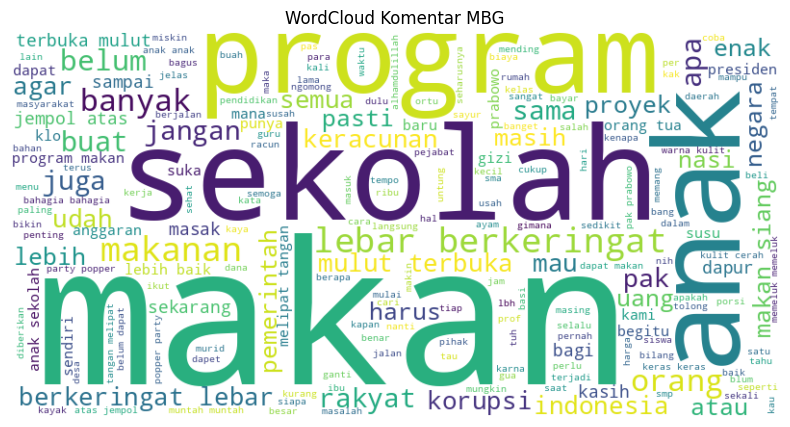

In [38]:
# ==========================================
# 4. MEMBUAT WORDCLOUD
# ==========================================
print("Generating WordCloud...")
all_text = ' '.join(df_viz['text_viz'])

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis', max_words=200).generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Komentar MBG')
plt.show() # Atau plt.savefig('wordcloud.png')

In [39]:
# ==========================================
# 5. FUNGSI MEMBUAT N-GRAM (Bar Chart)
# ==========================================
def plot_ngram(corpus, n=2, title='Bigram', color='blue'):
    # Menggunakan CountVectorizer dari Scikit-Learn
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)

    # Menghitung frekuensi
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:10] # Top 10

    # Plotting
    x, y = zip(*words_freq)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(y), y=list(x), palette=color)
    plt.title(title)
    plt.xlabel('Frekuensi Muncul')
    plt.show()

Generating Bigrams...


/tmp/ipython-input-1493258793.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y), y=list(x), palette=color)


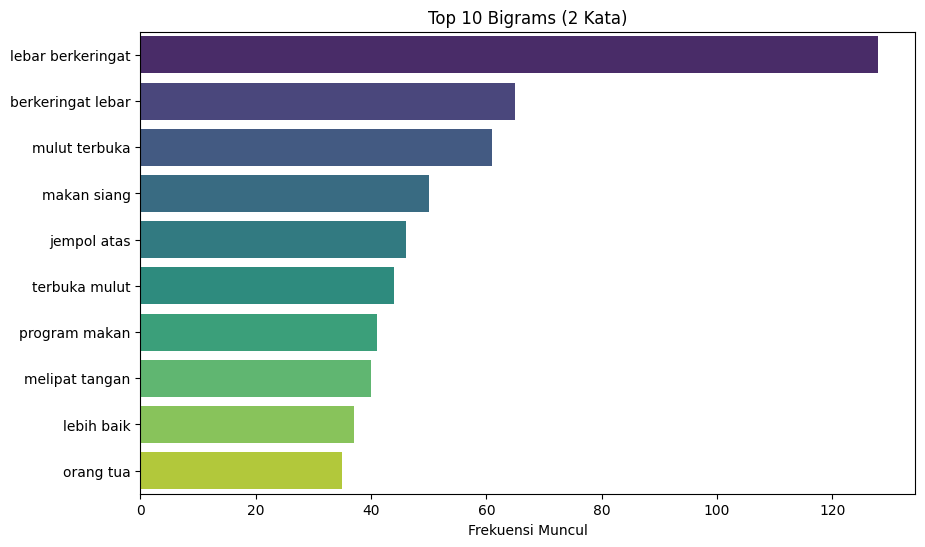

Generating Trigrams...


/tmp/ipython-input-1493258793.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y), y=list(x), palette=color)


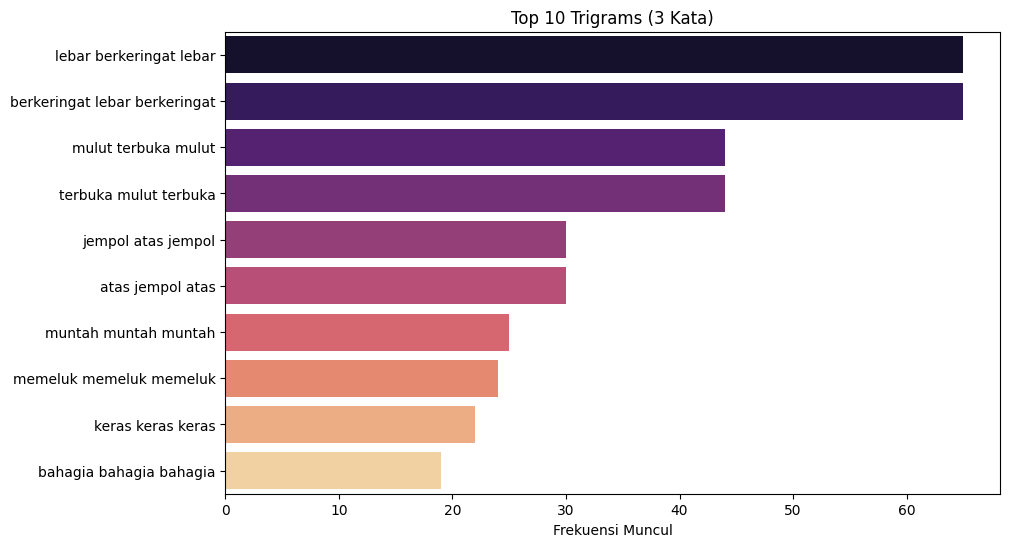

In [40]:
# ==========================================
# 6. TAMPILKAN BIGRAM & TRIGRAM
# ==========================================
print("Generating Bigrams...")
plot_ngram(df_viz['text_viz'], n=2, title='Top 10 Bigrams (2 Kata)', color='viridis')

print("Generating Trigrams...")
plot_ngram(df_viz['text_viz'], n=3, title='Top 10 Trigrams (3 Kata)', color='magma')

In [41]:
# Baca dataset (ubah nama sesuai file kamu)
df = pd.read_csv('data_bersih_mbg.csv')

# Tampilkan 5 baris pertama
df.head()

,comment_text,text_clean,label_manual,label_llm
0,😱😱😱😱😱😱😱,wajah sangat ketakutan wajah sangat ketakutan ...,NaN,NaN
1,Bubar aja mbg itu. Bagus di kasih uang jajan a...,bubar aja makan bergizi gratis itu bagus di ka...,NaN,NaN
2,"Wajib diapresiasi, Presiden Prabowo konsisten ...",wajib diapresiasi presiden prabowo konsisten p...,NaN,NaN
3,Astaghfirullah,astaghfirullah,NaN,NaN
4,Di sekolah aku ada 😢😢😢,di sekolah saya ada wajah menangis wajah menan...,NaN,NaN


In [42]:
df = df[['text_clean', 'label_manual']]
df.head()

,text_clean,label_manual
0,wajah sangat ketakutan wajah sangat ketakutan ...,NaN
1,bubar aja makan bergizi gratis itu bagus di ka...,NaN
2,wajib diapresiasi presiden prabowo konsisten p...,NaN
3,astaghfirullah,NaN
4,di sekolah saya ada wajah menangis wajah menan...,NaN


In [43]:
# Simpan ke Excel
df.to_csv('data_bersih_filter_manual.csv', index=False)